# Regression Project

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
WORK_DIR = os.getcwd()

## Now we load Dataset

In [3]:
data = pd.read_csv(WORK_DIR + '\\data\\House Demolitions in Palestine.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/powerfull/Development/RihalIntern/Regression\\data\\House Demolitions in Palestine.csv'

In [ ]:
data.head()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN


## Let's Explore the Dataset

In [ ]:
data.dtypes

Year                         float64
Housing Units                 object
People Left Homeless          object
Minors Left Homeless          object
Area                          object
Type of Structure             object
Demolish Scope                object
District                      object
Demolition Reason             object
Demolition carried out by     object
dtype: object

In [ ]:
set(data['Year']) #To see the Years

{nan,
 nan,
 nan,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0}

In [ ]:
set(data['Area']) #To see the Unique Areas

{'East Jerusalem',
 'Gaza Strip',
 'The West Bank (Excluding East Jerusalem)',
 nan}

In [ ]:
set(data['Type of Structure']) #To see the types of Structure

{'Non Residential Structure', 'Residential Structure', nan}

In [ ]:
"""def remove_comma(word):
    temp = ''
    for char in word:
        if char not in [',']:
            temp + char
    return temp
"""


"def remove_comma(word):\n    temp = ''\n    for char in word:\n        if char not in [',']:\n            temp + char\n    return temp\n"

In [ ]:
def remove_comma(s):
    try:
        return s.replace(',', '')
    except:
        return s


In [ ]:
remove_comma("Hello,")

'Hello'

In [ ]:
data.isnull().values.sum()

417

In [ ]:

data['Housing Units'].fillna(0, inplace=True)
data['People Left Homeless'].fillna(0, inplace=True)
data['Minors Left Homeless'].fillna(0, inplace=True)

C:\Users\MoAly\AppData\Local\Temp\ipykernel_5012\2193068225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Housing Units'].fillna(0, inplace=True)
C:\Users\MoAly\AppData\Local\Temp\ipykernel_5012\2193068225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
data.isnull().values.sum()

410

In [ ]:
data['Housing Units'] = [remove_comma(i) for i in data['Housing Units']]

In [ ]:
data['People Left Homeless'] = [remove_comma(i) for i in data['People Left Homeless']]

In [ ]:
data['Minors Left Homeless'] = [remove_comma(i) for i in data['Minors Left Homeless']]

In [ ]:
data['Demolish Scope'].isnull().values.sum()

175

In [ ]:
data.shape

(272, 10)

In [ ]:
temp = ['Unknown' if scope is None else scope for scope in data['Demolish Scope']]


In [ ]:
len(temp)

272

In [ ]:
data['Demolish Scope'] = temp

In [ ]:
data.head()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Al-Quds,Demolition on the pretext of unlawful construc...,NaN
1,2021.0,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Bethlehem,Demolition on the pretext of unlawful construc...,NaN
2,2021.0,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Hebron,Demolition on the pretext of unlawful construc...,NaN
3,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jenin,Demolition on the pretext of unlawful construc...,NaN
4,2021.0,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,NaN,Jericho,Demolition on the pretext of unlawful construc...,NaN


In [ ]:
data['Year'].isnull().values.sum()


3

In [ ]:
data = data[data['Year'].isnull() == False]

In [ ]:
data['Year'].isnull().values.sum()


0

In [ ]:
data['Year'] = [int(i) for i in data['Year']]

In [ ]:
data['Housing Units'] = [float(i) for i in data['Housing Units']] #Convert String to float

In [ ]:
data['People Left Homeless'] = [float(i) for i in data['People Left Homeless']] #Convert String to float

In [ ]:
data['Minors Left Homeless'] = [float(i) for i in data['Minors Left Homeless']] #Convert String to float

<Axes: >

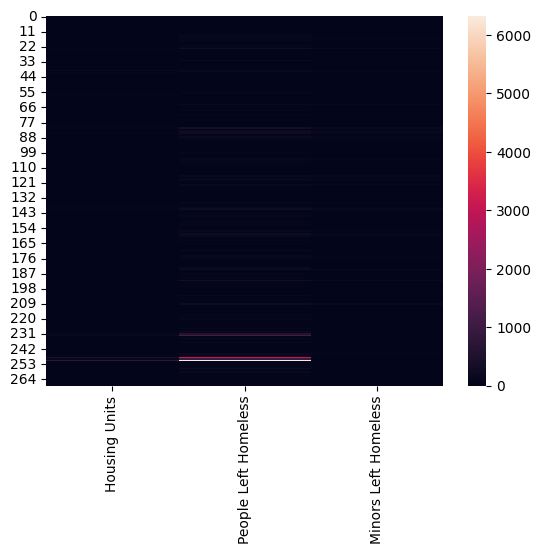

In [ ]:
sns.heatmap(data[['Housing Units','People Left Homeless','Minors Left Homeless']])

In [ ]:
selected_feature = data[['Year','Housing Units','People Left Homeless','Minors Left Homeless']]

In [ ]:
selected_feature = selected_feature.sort_values(by='Year')

In [ ]:
selected_feature.isnull().values.sum()

0

In [ ]:
"""def summation_per_year(data):
    HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless, temp = [], [], [], []
    for year in data['Year']:
        temp = []
        for value in data['Housing Units']:
            if value in data[year]:
                temp.append(value)
        HousingUnits.append(sum(temp))
        temp = []
        for value in data['People Left Homeless']:
            if value in data[year]:
                temp.append(value)
        PeopleLeftHomeless.append(sum(temp))
        temp = []
        for value in data['Minors Left Homeless']:
            if value in data[year]:
                temp.append(value)
        MinorsLeftHomeless.append(sum(temp))
        temp = []
    return HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless"""

"def summation_per_year(data):\n    HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless, temp = [], [], [], []\n    for year in data['Year']:\n        temp = []\n        for value in data['Housing Units']:\n            if value in data[year]:\n                temp.append(value)\n        HousingUnits.append(sum(temp))\n        temp = []\n        for value in data['People Left Homeless']:\n            if value in data[year]:\n                temp.append(value)\n        PeopleLeftHomeless.append(sum(temp))\n        temp = []\n        for value in data['Minors Left Homeless']:\n            if value in data[year]:\n                temp.append(value)\n        MinorsLeftHomeless.append(sum(temp))\n        temp = []\n    return HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless"

In [ ]:
set(selected_feature['Year'])

{2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021}

In [ ]:
def summation_per_year(data):
    HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless = [], [], []
    for year in data['Year']:
        # Filter the data for the current year
        year_data = data[data['Year'] == year]
        # Sum the values for 'Housing Units', 'People Left Homeless', and 'Minors Left Homeless'
        HousingUnits.append(year_data['Housing Units'].sum())
        PeopleLeftHomeless.append(year_data['People Left Homeless'].sum())
        MinorsLeftHomeless.append(year_data['Minors Left Homeless'].sum())
    return HousingUnits, PeopleLeftHomeless, MinorsLeftHomeless


In [ ]:
HU = set(summation_per_year(selected_feature)[0])
PLH = set(summation_per_year(selected_feature)[1])
MLH = set(summation_per_year(selected_feature)[2])

In [ ]:
HU = list(HU)
MLH = list(MLH)
PLH = list(PLH)

In [ ]:
len(HU), len(PLH), len(MLH), len(set(selected_feature['Year']))

(18, 18, 18, 18)

In [ ]:
eng_df = {
    'Year' : [year for year in set(selected_feature['Year'])],
    'Housing Units' : HU,
    'People Left Homeless' : PLH,
    'Minors Left Homeless' : MLH 
}

In [ ]:
eng_df = pd.DataFrame(eng_df)

In [ ]:
eng_df = eng_df.sort_values(by='Year')

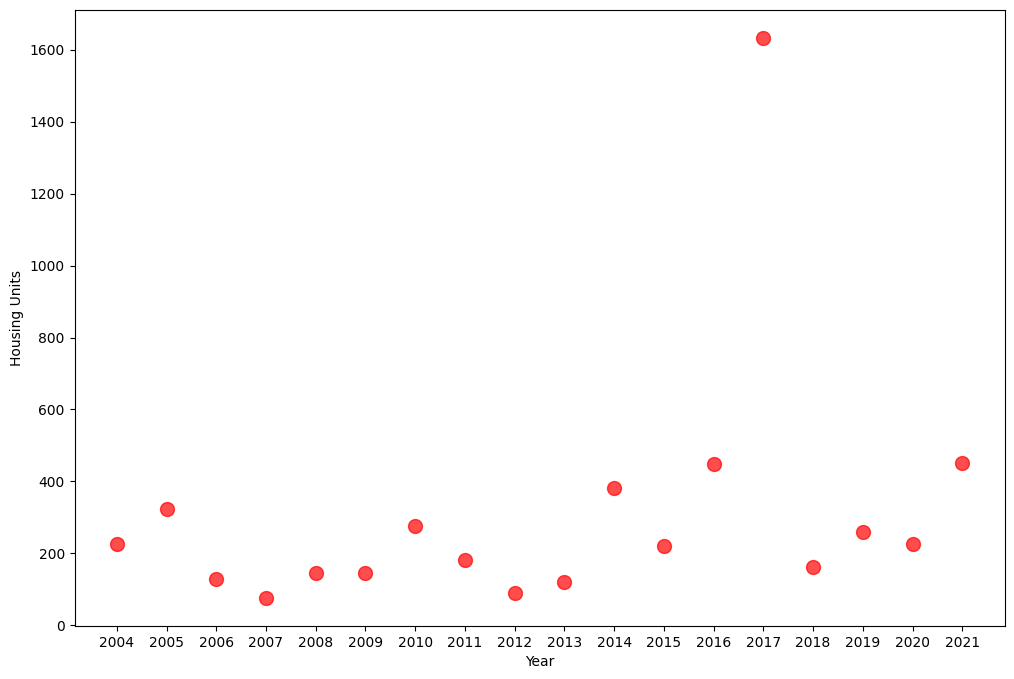

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y = eng_df['Housing Units'], x = [str(year)for year in eng_df['Year']], s = 100, alpha=0.7, c = 'red')
plt.xlabel("Year")
plt.ylabel('Housing Units')
plt.show()

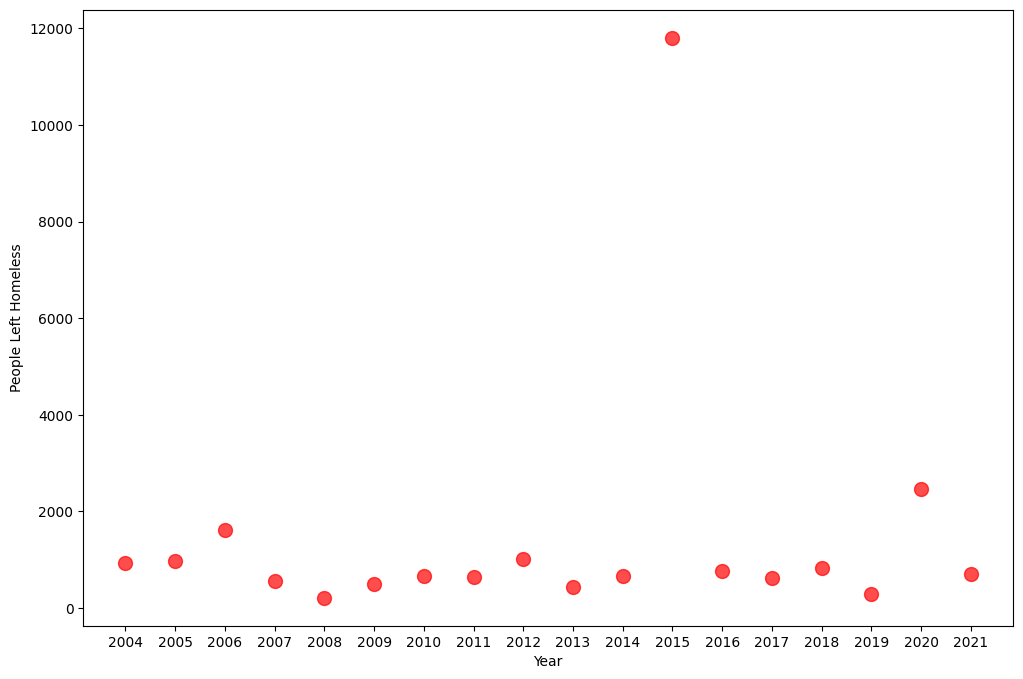

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y = eng_df['People Left Homeless'], x = [str(year)for year in eng_df['Year']], s = 100, alpha=0.7, c = 'red')
plt.xlabel("Year")
plt.ylabel('People Left Homeless')
plt.show()

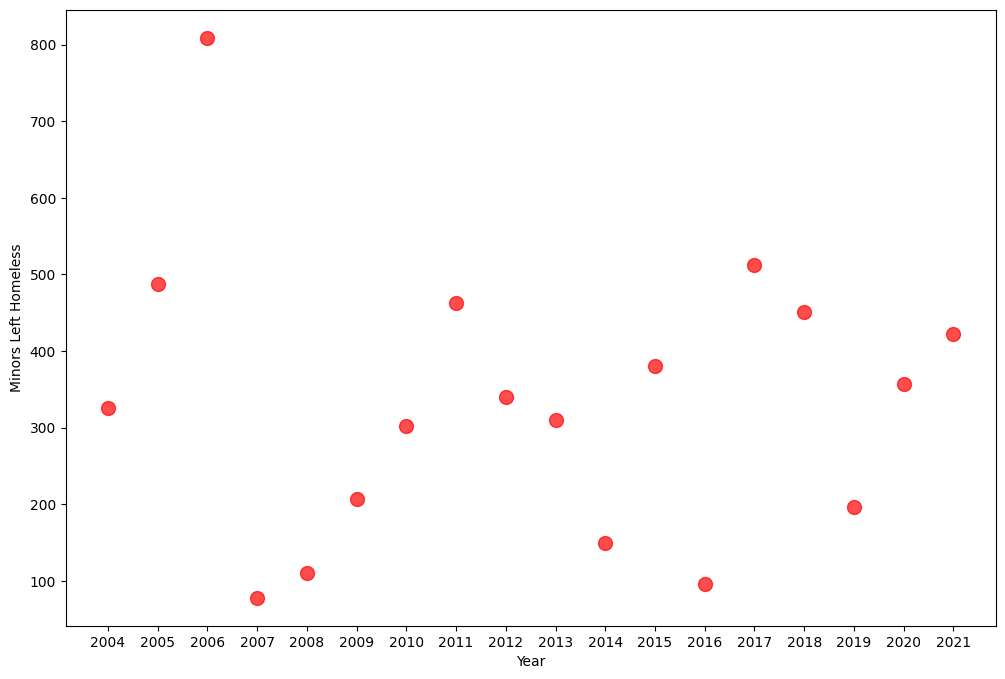

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y = eng_df['Minors Left Homeless'], x = [str(year)for year in eng_df['Year']], s = 100, alpha=0.7, c = 'red')
plt.xlabel("Year")
plt.ylabel('Minors Left Homeless')
plt.show()

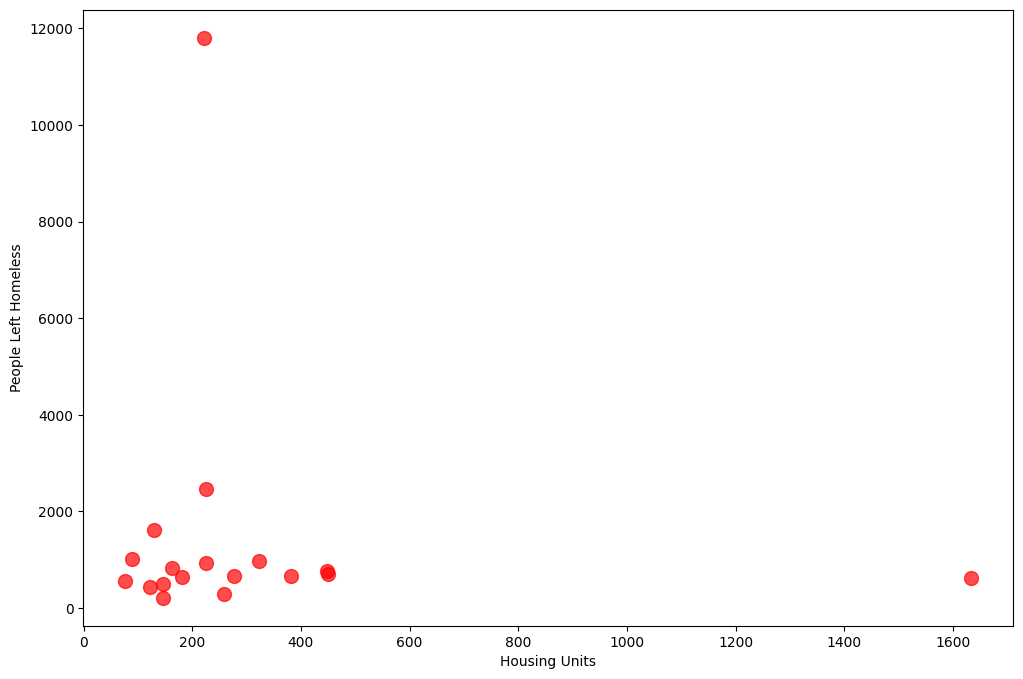

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y = eng_df['People Left Homeless'], x = [year for year in eng_df['Housing Units']], s = 100, alpha=0.7, c = 'red')
plt.xlabel('Housing Units')
plt.ylabel('People Left Homeless')
plt.show()

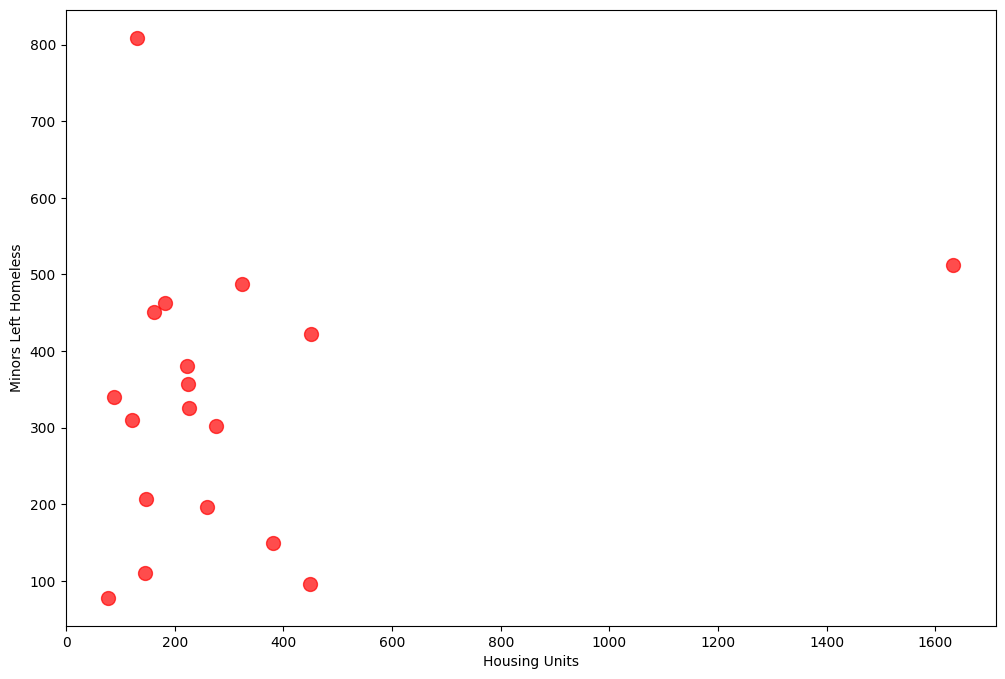

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y = eng_df['Minors Left Homeless'], x = [year for year in eng_df['Housing Units']], s = 100, alpha=0.7, c = 'red')
plt.xlabel('Housing Units')
plt.ylabel('Minors Left Homeless')
plt.show()

### By Exploring Data it appears that it's not sutable for Regression